# Training experimental models

In [1]:
from dataset.dataset import load_fashion_mnist_dataset

X_train, X_test = load_fashion_mnist_dataset()

X_train.shape, X_test.shape

2023-11-08 21:24:12.684208: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-08 21:24:12.746947: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-08 21:24:12.748229: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-08 21:24:13.734762: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


((60000, 784), (10000, 784))

In [2]:
flatten_dim = X_train[0].shape[0]

In [4]:
import pickle

def pickle_results(dim: int, learning_rate: float, batch_size: int, optimizer: Optimizer, autoencoder: Autoencoder):
    with open(f"saved_models/networks/autoencoder_{dim}_{learning_rate}_{batch_size}", 'wb') as pickle_file:
        pickle.dump(autoencoder, pickle_file)

    with open(f"saved_models/optimizers/optimizer_{dim}_{learning_rate}_{batch_size}", 'wb') as pickle_file:
        pickle.dump(optimizer, pickle_file)

In [5]:
code_dims = [12, 36, 108]
learning_rates = [1, 0.9, 0.09]
batch_sizes = [16, 128, 512]

In [6]:
# Code dim

learning_rate=learning_rates[1]
batch_size=batch_sizes[1]

for code_dim in code_dims:
    autoencoder = Autoencoder(input_dim=flatten_dim, code_dim=code_dim, encoder_hidden_count=0, reduce_by=1.5)
    optimizer = Optimizer(
        autoencoder,
        loss=MeanSquaredError(),
        accuracy=Accuracy(),
        learning_rate=learning_rate,
        batch_size=batch_size,
        epochs=150,
    )
    
    optimizer.fit(X_train, X_train)

    pickle_results(code_dim, learning_rate, batch_size, optimizer, autoencoder)

Epoch 0  -- accuracy 0.002 - loss 0.136
Epoch 1  -- accuracy 0.002 - loss 0.093
Epoch 2  -- accuracy 0.002 - loss 0.088
Epoch 3  -- accuracy 0.002 - loss 0.087
Epoch 4  -- accuracy 0.002 - loss 0.087
Epoch 5  -- accuracy 0.002 - loss 0.087
Epoch 6  -- accuracy 0.002 - loss 0.087
Epoch 7  -- accuracy 0.002 - loss 0.087
Epoch 8  -- accuracy 0.002 - loss 0.087
Epoch 9  -- accuracy 0.002 - loss 0.087
Epoch 10  -- accuracy 0.002 - loss 0.087
Epoch 11  -- accuracy 0.002 - loss 0.087
Epoch 12  -- accuracy 0.002 - loss 0.087
Epoch 13  -- accuracy 0.002 - loss 0.087
Epoch 14  -- accuracy 0.002 - loss 0.087
Epoch 15  -- accuracy 0.002 - loss 0.087
Epoch 16  -- accuracy 0.002 - loss 0.087
Epoch 17  -- accuracy 0.002 - loss 0.087
Epoch 18  -- accuracy 0.002 - loss 0.087
Epoch 19  -- accuracy 0.002 - loss 0.087
Epoch 20  -- accuracy 0.002 - loss 0.087
Epoch 21  -- accuracy 0.002 - loss 0.087
Epoch 22  -- accuracy 0.002 - loss 0.087
Epoch 23  -- accuracy 0.002 - loss 0.087
Epoch 24  -- accuracy 0.00

In [7]:
# Learning rate

code_dim=code_dims[1]
batch_size=batch_sizes[1]

for learning_rate in learning_rates[::2]:
    autoencoder = Autoencoder(input_dim=flatten_dim, code_dim=code_dim, encoder_hidden_count=0, reduce_by=1.5)
    optimizer = Optimizer(
        autoencoder,
        loss=MeanSquaredError(),
        accuracy=Accuracy(),
        learning_rate=learning_rate,
        batch_size=batch_size,
        epochs=150,
    )

    optimizer.fit(X_train, X_train)

    pickle_results(code_dim, learning_rate, batch_size, optimizer, autoencoder)
    

Epoch 0  -- accuracy 0.001 - loss 0.133
Epoch 1  -- accuracy 0.001 - loss 0.091
Epoch 2  -- accuracy 0.001 - loss 0.087
Epoch 3  -- accuracy 0.001 - loss 0.085
Epoch 4  -- accuracy 0.001 - loss 0.082
Epoch 5  -- accuracy 0.002 - loss 0.076
Epoch 6  -- accuracy 0.003 - loss 0.069
Epoch 7  -- accuracy 0.004 - loss 0.063
Epoch 8  -- accuracy 0.004 - loss 0.058
Epoch 9  -- accuracy 0.004 - loss 0.053
Epoch 10  -- accuracy 0.004 - loss 0.050
Epoch 11  -- accuracy 0.004 - loss 0.047
Epoch 12  -- accuracy 0.004 - loss 0.045
Epoch 13  -- accuracy 0.004 - loss 0.044
Epoch 14  -- accuracy 0.005 - loss 0.043
Epoch 15  -- accuracy 0.006 - loss 0.041
Epoch 16  -- accuracy 0.006 - loss 0.040
Epoch 17  -- accuracy 0.007 - loss 0.040
Epoch 18  -- accuracy 0.007 - loss 0.039
Epoch 19  -- accuracy 0.007 - loss 0.038
Epoch 20  -- accuracy 0.007 - loss 0.038
Epoch 21  -- accuracy 0.007 - loss 0.037
Epoch 22  -- accuracy 0.008 - loss 0.037
Epoch 23  -- accuracy 0.008 - loss 0.037
Epoch 24  -- accuracy 0.00

In [8]:
# Batch size

code_dim=code_dims[1]
learning_rate=learning_rates[1]

for batch_size in batch_sizes[::2]:
    autoencoder = Autoencoder(input_dim=flatten_dim, code_dim=code_dim, encoder_hidden_count=0, reduce_by=1.5)
    optimizer = Optimizer(
        autoencoder,
        loss=MeanSquaredError(),
        accuracy=Accuracy(),
        learning_rate=learning_rate,
        batch_size=batch_size,
        epochs=150,
    )
    
    optimizer.fit(X_train, X_train)

    pickle_results(code_dim, learning_rate, batch_size, optimizer, autoencoder)



Epoch 0  -- accuracy 0.001 - loss 0.087
Epoch 1  -- accuracy 0.004 - loss 0.048
Epoch 2  -- accuracy 0.005 - loss 0.039
Epoch 3  -- accuracy 0.008 - loss 0.035
Epoch 4  -- accuracy 0.010 - loss 0.032
Epoch 5  -- accuracy 0.011 - loss 0.030
Epoch 6  -- accuracy 0.012 - loss 0.029
Epoch 7  -- accuracy 0.013 - loss 0.028
Epoch 8  -- accuracy 0.013 - loss 0.027
Epoch 9  -- accuracy 0.012 - loss 0.027
Epoch 10  -- accuracy 0.012 - loss 0.027
Epoch 11  -- accuracy 0.011 - loss 0.027
Epoch 12  -- accuracy 0.011 - loss 0.026
Epoch 13  -- accuracy 0.011 - loss 0.026
Epoch 14  -- accuracy 0.011 - loss 0.026
Epoch 15  -- accuracy 0.011 - loss 0.026
Epoch 16  -- accuracy 0.011 - loss 0.026
Epoch 17  -- accuracy 0.012 - loss 0.026
Epoch 18  -- accuracy 0.012 - loss 0.026
Epoch 19  -- accuracy 0.012 - loss 0.025
Epoch 20  -- accuracy 0.012 - loss 0.025
Epoch 21  -- accuracy 0.011 - loss 0.025
Epoch 22  -- accuracy 0.011 - loss 0.025
Epoch 23  -- accuracy 0.011 - loss 0.025
Epoch 24  -- accuracy 0.01

# Regularisation techniques

## Injecting noise

In [9]:
from dataset.dataset import load_fashion_mnist_dataset

noisy_X_train, X_train = load_fashion_mnist_dataset(noisy=True, noise_level=0.08)

noisy_X_train.shape, X_train.shape

((60000, 784), (60000, 784))

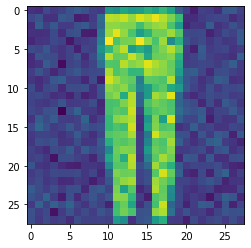

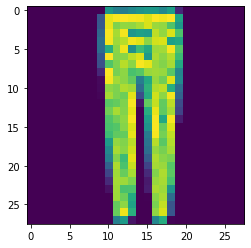

In [12]:
from matplotlib import pyplot as plt
from numpy import random

random_idx = random.randint(0,noisy_X_train.shape[0])

plt.imshow(noisy_X_train[random_idx].reshape(28, 28), interpolation='nearest')
plt.show()

plt.imshow(X_train[random_idx].reshape(28, 28), interpolation='nearest')
plt.show()

In [13]:
import pickle

from models.metrics import MeanSquaredError
from models.neural_network import Autoencoder
from models.optimizer import Optimizer

autoencoder = Autoencoder(input_dim=flatten_dim, code_dim=108, encoder_hidden_count=1, reduce_by=1.5)
optimizer = Optimizer(
    autoencoder,
    loss=MeanSquaredError(),
    learning_rate=0.9,
    batch_size=128,
    epochs=500,
)
    
optimizer.fit(noisy_X_train, X_train)

path = "saved_models/networks/regularisation/noise"

with open(f"{path}/autoencoder", 'wb') as pickle_file:
    pickle.dump(autoencoder, pickle_file)

with open(f"{path}/optimizer", 'wb') as pickle_file:
    pickle.dump(optimizer, pickle_file)

NameError: name 'Autoencoder' is not defined